# **PROYECTO FINAL. INTRODUCCIÓN A LA CIENCIA DE DATOS.**
# **Modelo Predictivo de Alta Precisión para el Sector Automotriz.**

* **Autor:** Daniel Carvajal Garcia.
* **Matrícula:** 202502492
* **Profesor:** Jaime Alejandro Romero Sierra.
* **Semestre:** 1er Semestre. 
* **Institución:** Benemérita Universidad Autónoma de Puebla.
* **Licenciatura:** Ingenieria en Ciencia de Datos.

### **Descripción de la base de datos**

* **Fuente de la base de datos original:** https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales

* **Descripción general del contenido:** Este conjunto de datos contiene información detallada sobre la venta de automóviles, abarcando múltiples fabricantes y modelos. Es idóneo para el análisis de datos, la predicción de precios, el análisis de tendencias del mercado, el aprendizaje automático y el análisis exploratorio de datos (EDA).
El conjunto de datos incluye información sobre fabricantes, modelos de automóviles, especificaciones del motor, tipo de combustible, año de fabricación, kilometraje y precio final de venta.

### **Análisis Exploratorio de Datos (EDA)**

In [1]:
#Extraemos el DataFrame

import pandas as pd
import numpy as np

df = pd.read_csv("Base_LimpiaparaAnálisis.csv")
df

,Fabricante,Modelo,Tamaño del motor,Tipo de combustible,Año de fabricacion,Kilometraje,Precio
0,ford,fiesta,1.0,petrol,2002.0,127300.0,74667.0
1,ford,mondeo,1.6,diesel,2014.0,39190.0,584709.0
2,ford,focus,1.4,petrol,2018.0,33603.0,709365.0
3,ford,mondeo,1.8,diesel,2010.0,86686.0,348562.0
4,ford,mondeo,1.6,diesel,1996.0,100862.5,137651.0
...,...,...,...,...,...,...,...
38314,bmw,z4,2.0,petrol,2021.0,8366.0,1313798.0
38315,bmw,z4,1.6,petrol,2008.0,55407.0,460781.0
38316,bmw,x3,1.6,petrol,2007.0,83990.0,374017.0
38317,bmw,x3,3.0,diesel,1999.0,167781.0,134421.0


Se importan las librerías base (pandas) y se carga el archivo Base_Final.csv resultante de la etapa de limpieza previa. Esto asegura que iniciamos el EDA con datos procesados.

In [2]:
# Verificar la nueva forma del dataframe

print(df.shape)

# Se ejecuta describe()
# Se rectifica que los 'min' de Precio y Año ya no son 0.

print(df.describe())

(38319, 7)
       Tamaño del motor  Año de fabricacion    Kilometraje        Precio
count      38319.000000        38319.000000   38319.000000  3.831900e+04
mean           1.744490         2004.280253  109885.828806  3.017309e+05
std            0.694533            8.815940   61836.584405  3.084592e+05
min            1.000000         1988.000000    1000.000000  6.243000e+03
25%            1.400000         1997.000000   61474.000000  8.035100e+04
50%            1.600000         2004.000000  100862.500000  1.931300e+05
75%            2.000000         2012.000000  149751.500000  4.307470e+05
max            5.000000         2022.000000  287301.000000  2.446926e+06


In [3]:
# ASEGURAR QUE EL AÑO SEA NUMÉRICO (Importante para el anális de datos)

df['Año de fabricacion'] = pd.to_numeric(df['Año de fabricacion'], errors='coerce')

In [4]:
# CONVERSIÓN FINAL A ENTEROS (Importante para el análisis de datos)

df['Año de fabricacion'] = df['Año de fabricacion'].astype(int)
df['Kilometraje'] = df['Kilometraje'].astype(int)
df['Precio'] = df['Precio'].astype(int)

Se aplica una conversión explícita de tipos (astype(int)). Transformamos las variables Año, Kilometraje y Precio a números enteros para optimizar la memoria y mejorar la presentación visual en tablas y gráficos (evitando decimales innecesarios como .0).

In [5]:
print("===== RESUMEN DE LIMPIEZA =====")
print("Registros finales:", len(df))
print("Columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos restantes:")
print(df.isna().sum())
print("=================================")

===== RESUMEN DE LIMPIEZA =====
Registros finales: 38319
Columnas: 7

Tipos de datos:
Fabricante              object
Modelo                  object
Tamaño del motor       float64
Tipo de combustible     object
Año de fabricacion       int64
Kilometraje              int64
Precio                   int64
dtype: object

Valores nulos restantes:
Fabricante             0
Modelo                 0
Tamaño del motor       0
Tipo de combustible    0
Año de fabricacion     0
Kilometraje            0
Precio                 0
dtype: int64


Se imprime un resumen de integridad del dataset (número de filas, columnas y conteo de nulos) para certificar que la base de datos está completa antes de iniciar el análisis visual.

# **ANÁLISIS EXPLORATORIO (EDA)**

El Análisis Exploratorio de Datos (EDA) es una fase esencial para comprender la estructura,
patrones y relaciones dentro del dataset antes de construir el modelo.
Esta sección debe dividirse en los siguientes apartados y acompañarse con gráficos, tablas, y
explicaciones breves

1. Descripción general de los datos. 

Visión General

In [6]:
df.shape

(38319, 7)

Ejecución de df.shape para dimensionar el volumen de datos (registros vs variables) y confirmar el tamaño de la muestra, se confirma que el dataset tiene un total de 38319 datos y estan divididos en 7 columnas. 

2. Tipos de Variables. 

In [7]:
df.dtypes

Fabricante              object
Modelo                  object
Tamaño del motor       float64
Tipo de combustible     object
Año de fabricacion       int64
Kilometraje              int64
Precio                   int64
dtype: object

Se rectifica que la columna:
Fabricante, Modelo, Tipo de Combustible → son categóricas

Año de fabricación → es numérica

Kilometraje → es numérica

Precio → es numérica

Tamaño de motor → es numérica con punto flotante

3. Resumen estadístico

In [8]:
df.describe

<bound method NDFrame.describe of       Fabricante  Modelo  Tamaño del motor Tipo de combustible  \
0           ford  fiesta               1.0              petrol   
1           ford  mondeo               1.6              diesel   
2           ford   focus               1.4              petrol   
3           ford  mondeo               1.8              diesel   
4           ford  mondeo               1.6              diesel   
...          ...     ...               ...                 ...   
38314        bmw      z4               2.0              petrol   
38315        bmw      z4               1.6              petrol   
38316        bmw      x3               1.6              petrol   
38317        bmw      x3               3.0              diesel   
38318        bmw      x3               2.4              diesel   

       Año de fabricacion  Kilometraje   Precio  
0                    2002       127300    74667  
1                    2014        39190   584709  
2                    20

In [9]:
#Esta son para las variables categoricas

df.describe(include='int64')

,Año de fabricacion,Kilometraje,Precio
count,38319.000000,38319.000000,3.831900e+04
mean,2004.280253,109885.795402,3.017309e+05
std,8.815940,61836.589280,3.084592e+05
min,1988.000000,1000.000000,6.243000e+03
25%,1997.000000,61474.000000,8.035100e+04
50%,2004.000000,100862.000000,1.931300e+05
75%,2012.000000,149751.500000,4.307470e+05
max,2022.000000,287301.000000,2.446926e+06


Resumen estadístico para variables categoricos

In [10]:
df["Fabricante"].value_counts()

Fabricante
vw         11454
ford       11452
toyota      9659
bmw         3761
porsche     1993
Name: count, dtype: int64

In [11]:
df["Modelo"].value_counts()

Modelo
golf          3974
polo          3952
fiesta        3908
focus         3775
mondeo        3769
passat        3528
yaris         3297
prius         3254
rav4          3108
z4            1359
x3            1319
m5            1083
718 cayman     681
cayenne        676
911            636
Name: count, dtype: int64

In [12]:
df["Tipo de combustible"].value_counts()

Tipo de combustible
petrol    19761
diesel     9991
hybrid     8567
Name: count, dtype: int64

2. VISUALIZACIÓN Y DISTRIBUCIÓN DE VARIABLES INDIVIDUALES

Para variables númericas se va a utilizar el historgrama y boxplost

In [13]:
import sys
!{sys.executable} -m pip install matplotlib seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
df

,Fabricante,Modelo,Tamaño del motor,Tipo de combustible,Año de fabricacion,Kilometraje,Precio
0,ford,fiesta,1.0,petrol,2002,127300,74667
1,ford,mondeo,1.6,diesel,2014,39190,584709
2,ford,focus,1.4,petrol,2018,33603,709365
3,ford,mondeo,1.8,diesel,2010,86686,348562
4,ford,mondeo,1.6,diesel,1996,100862,137651
...,...,...,...,...,...,...,...
38314,bmw,z4,2.0,petrol,2021,8366,1313798
38315,bmw,z4,1.6,petrol,2008,55407,460781
38316,bmw,x3,1.6,petrol,2007,83990,374017
38317,bmw,x3,3.0,diesel,1999,167781,134421


In [15]:
df.columns

Index(['Fabricante', 'Modelo', 'Tamaño del motor', 'Tipo de combustible',
       'Año de fabricacion', 'Kilometraje', 'Precio'],
      dtype='object')

In [16]:
df.describe()

,Tamaño del motor,Año de fabricacion,Kilometraje,Precio
count,38319.000000,38319.000000,38319.000000,3.831900e+04
mean,1.744490,2004.280253,109885.795402,3.017309e+05
std,0.694533,8.815940,61836.589280,3.084592e+05
min,1.000000,1988.000000,1000.000000,6.243000e+03
25%,1.400000,1997.000000,61474.000000,8.035100e+04
50%,1.600000,2004.000000,100862.000000,1.931300e+05
75%,2.000000,2012.000000,149751.500000,4.307470e+05
max,5.000000,2022.000000,287301.000000,2.446926e+06


Se importa la librería matplotlib y seaborn, las cuales nos ayudaran en las graficas correspondientes. 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Configuración visual
sns.set_theme(style="whitegrid")

# Funciones de formato
def formato_dinero(x, pos):
    return f'${x*1e-3:.0f}k' if x < 1e6 else f'${x*1e-6:.1f}M'

def formato_miles(x, pos):
    return f'{x:,.0f}'

CREACIÓN DE HISTOGRAMAS Y BOXPLOST PARA VARIABLES NÚMERICAS. En este caso de realizaran para las variables: Año de Fabricación, Kilometraje, Precio y Tamaño de motor

## BOXPLOST e HISTOGRAMA de Precio ##

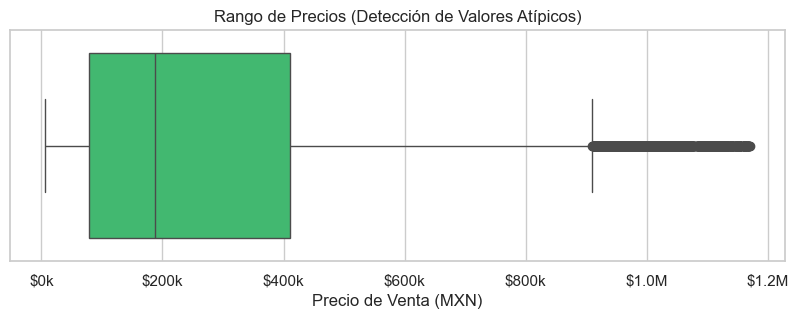

In [18]:
# Filtro visual
data_zoom = df[df['Precio'] <= df['Precio'].quantile(0.98)]

plt.figure(figsize=(10, 3)) 
sns.boxplot(x=data_zoom['Precio'], color="#2ecc6b")

plt.title('Rango de Precios (Detección de Valores Atípicos)')
plt.xlabel('Precio de Venta (MXN)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.show()

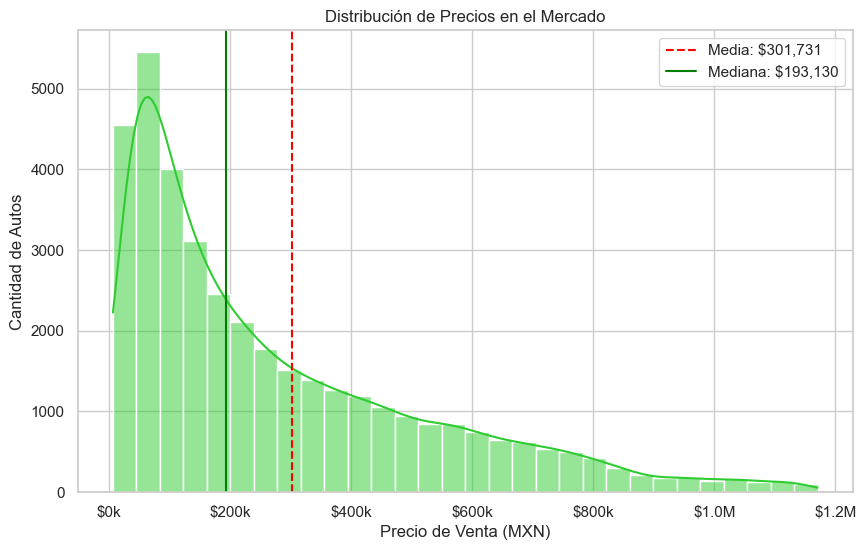

In [19]:
plt.figure(figsize=(10, 6)) 
sns.histplot(data_zoom['Precio'], kde=True, color="#2ecc31", bins=30)

plt.axvline(df['Precio'].mean(), color='red', linestyle='--', label=f"Media: ${df['Precio'].mean():,.0f}")
plt.axvline(df['Precio'].median(), color='green', linestyle='-', label=f"Mediana: ${df['Precio'].median():,.0f}")

plt.title('Distribución de Precios en el Mercado')
plt.xlabel('Precio de Venta (MXN)')
plt.ylabel('Cantidad de Autos')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.legend()
plt.show()

La variable objetivo ('Precio') presenta una distribución sesgada a la derecha. La mayor concentración de vehículos (moda) se encuentra en el rango de $100k a $350k MXN, lo que define el mercado masivo. Hallazgo de Negocio: El Boxplot superior muestra 'outliers' hacia la derecha. Estos no son errores, sino vehículos de gama alta (BMW, Porsche) que, aunque son menos frecuentes, tienen precios exponencialmente más altos. Hallazgo: Se decidió aplicar un filtro visual del 98% para este gráfico, lo que nos permite observar el comportamiento del mercado masivo sin la distorsión de los superdeportivos, confirmando que la base de datos es representativa del comprador promedio.

## BOXPLOST e HISTOGRAMA de Kilometraje ##

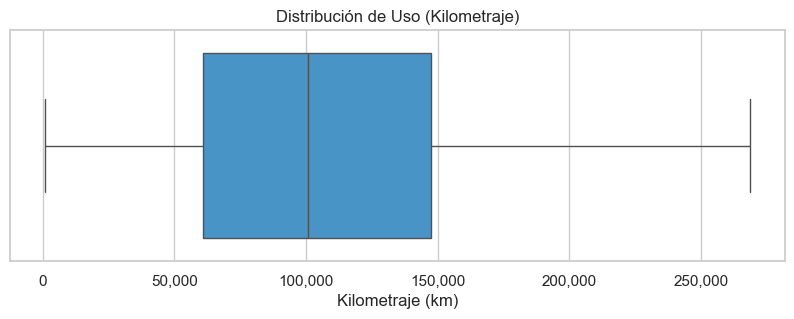

In [20]:
# Filtro visual
data_km = df[df['Kilometraje'] <= df['Kilometraje'].quantile(0.99)]

plt.figure(figsize=(10, 3))
sns.boxplot(x=data_km['Kilometraje'], color="#3498db")

plt.title('Distribución de Uso (Kilometraje)')
plt.xlabel('Kilometraje (km)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_miles))
plt.show()

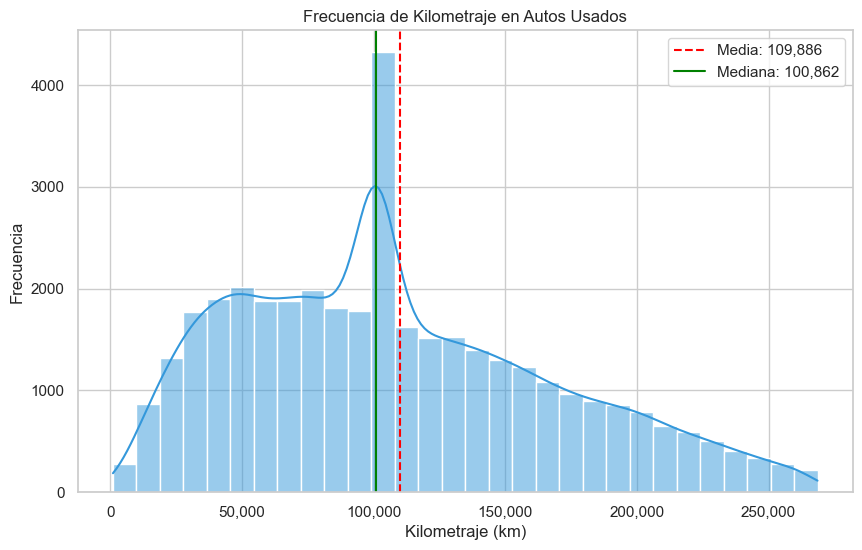

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data_km['Kilometraje'], kde=True, color="#3498db", bins=30)

plt.axvline(df['Kilometraje'].mean(), color='red', linestyle='--', label=f"Media: {df['Kilometraje'].mean():,.0f}")
plt.axvline(df['Kilometraje'].median(), color='green', linestyle='-', label=f"Mediana: {df['Kilometraje'].median():,.0f}")

plt.title('Frecuencia de Kilometraje en Autos Usados')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_miles))
plt.legend()
plt.show()

El histograma muestra que la distribución del kilometraje se concentra fuertemente alrededor de los 90,000 a 100,000 km (donde se ubican la media y la mediana). A diferencia de lo que se esperaría en un lote de autos 'seminuevos', la curva está desplazada hacia la derecha.

La caja central del diagrama (que representa el 50% de los datos) abarca un rango amplio, indicando una gran variabilidad en el uso de los vehículos. Se observan valores desde autos con muy poco uso hasta unidades que superan los 150,000 km.

## BOXPLOST e HISTOGRAMA de Año de Fabricación ##

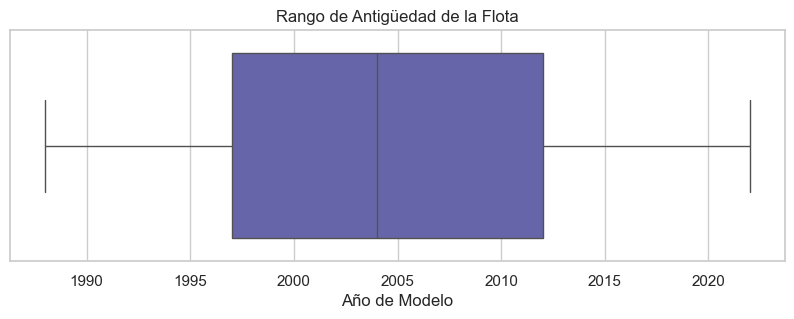

In [22]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Año de fabricacion'], color="#5c59b6")

plt.title('Rango de Antigüedad de la Flota')
plt.xlabel('Año de Modelo')

# Formato simple para años
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.show()

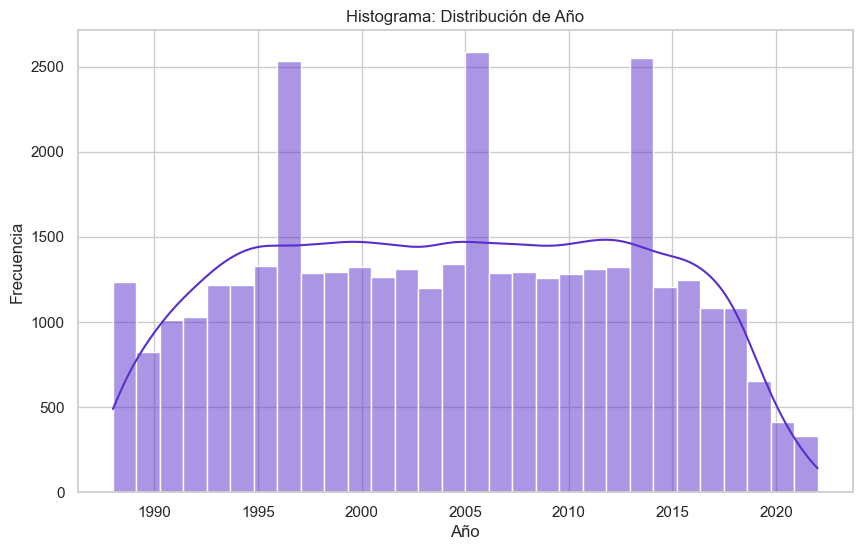

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Año de fabricacion', kde=True, color="#582ecc", bins=30)

plt.title('Histograma: Distribución de Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Se observa una distribución con sesgo a la izquierda, lo que indica que la gran mayoría de los datos se concentran en años pasados
El pico de la distribución se encuentra en los modelos de los últimos 20 a 10 años, disminuyendo progresivamente conforme avancemos en el tiempo.
Los autos con mayor antigüedad (modelos de los 90s o principios de los 2000s) tienen una frecuencia alta y baja a la vez.


## BOXPLOST e HISTOGRAMA de Tamaño de Motor ##

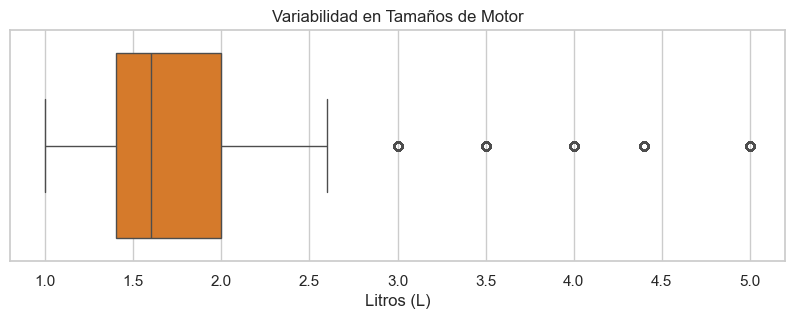

In [35]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Tamaño del motor'], color="#f1780f")

plt.title('Variabilidad en Tamaños de Motor')
plt.xlabel('Litros (L)')
plt.show()

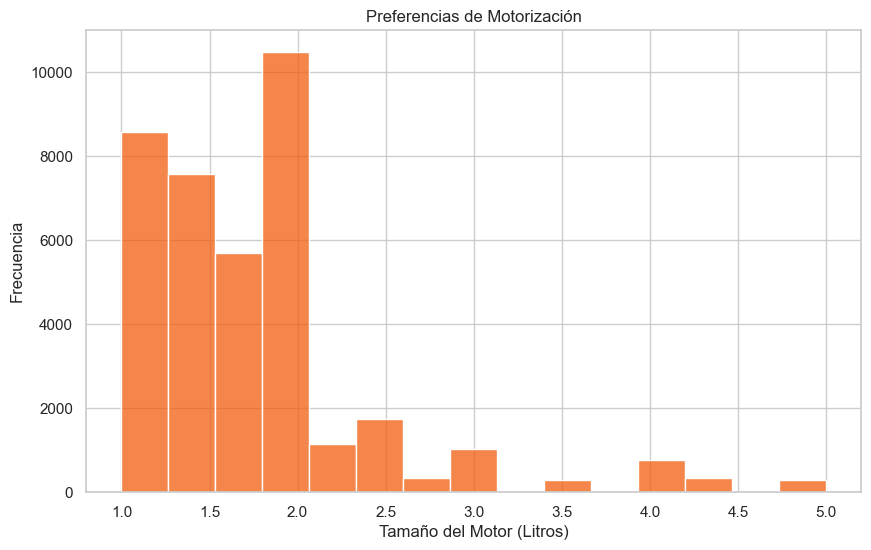

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tamaño del motor'], kde=False, color="#f15e0f", bins=15)

plt.title('Preferencias de Motorización')
plt.xlabel('Tamaño del Motor (Litros)')
plt.ylabel('Frecuencia')
plt.show()


La distribución del tamaño del motor no es continua, sino multimodal, concentrándose en valores estándar de la industria (1.0L, 1.2L, 1.6L y 2.0L). Se observa un claro predominio de motores pequeños (entre 1.0 y 2.0 litros), lo cual es consistente con la alta presencia de marcas generalistas como Ford y VW en el dataset. El diagrama de caja muestra valores atípicos hacia la derecha (motores de 3.0L o más), que corresponden a los vehículos deportivos o de lujo que decidimos conservar.

--- GENERANDO GRÁFICAS DE PRECIO ---


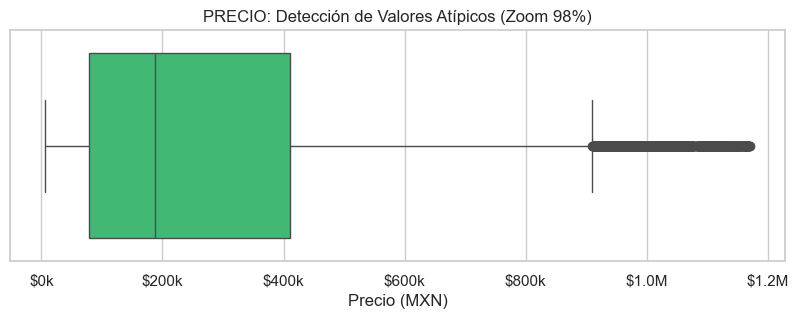

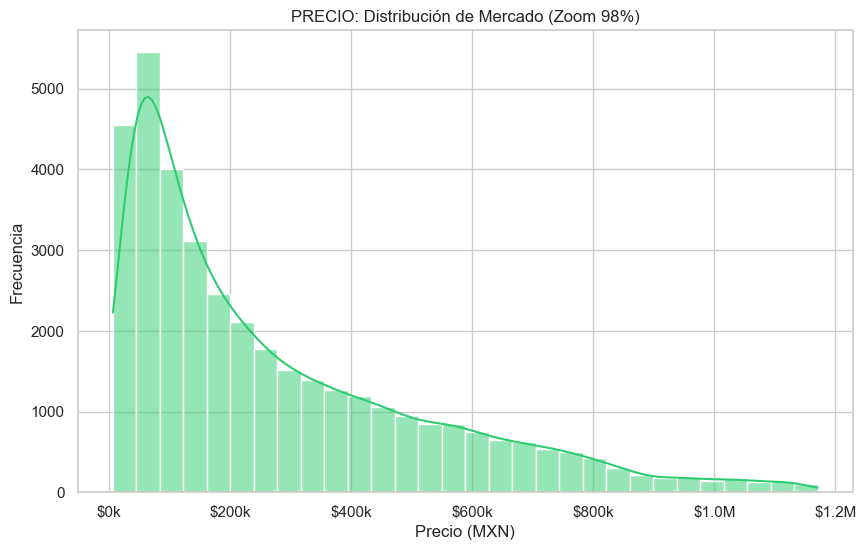


--- GENERANDO GRÁFICAS DE KILOMETRAJE ---


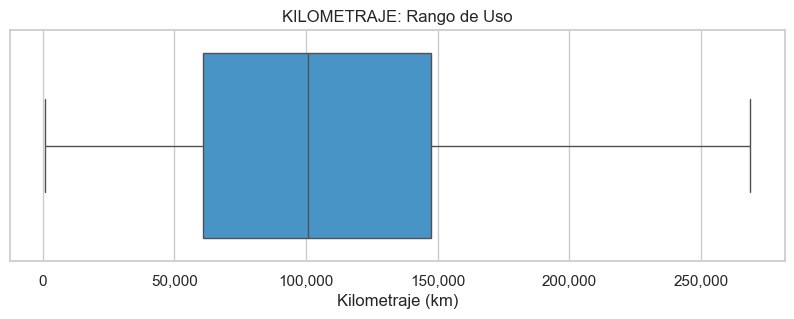

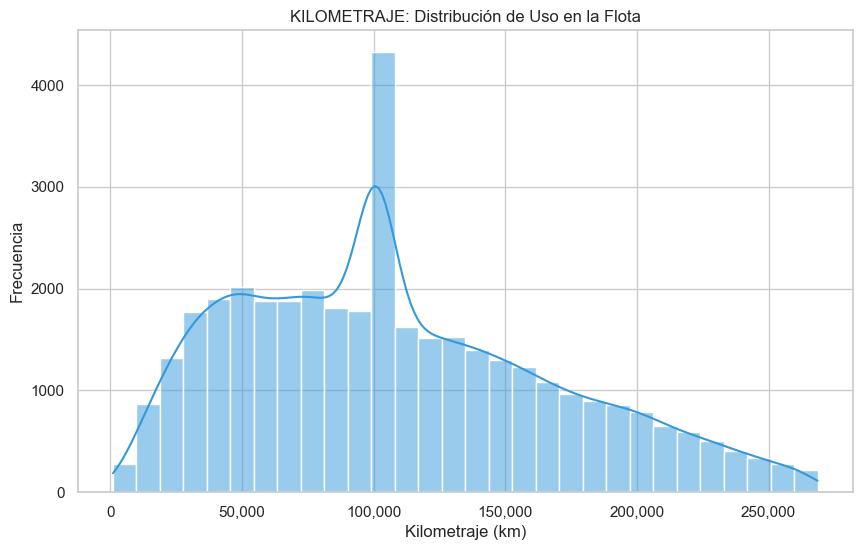


--- GENERANDO GRÁFICAS DE AÑO ---


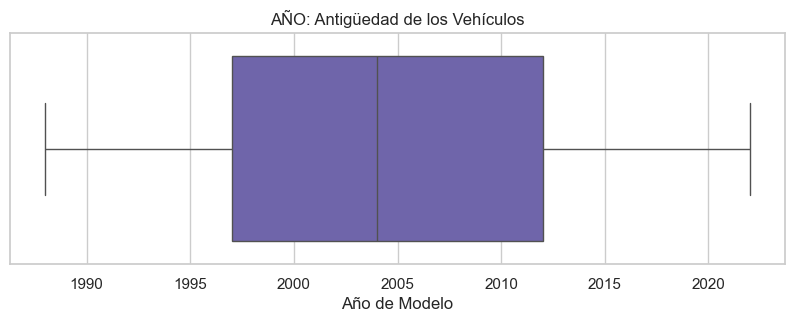

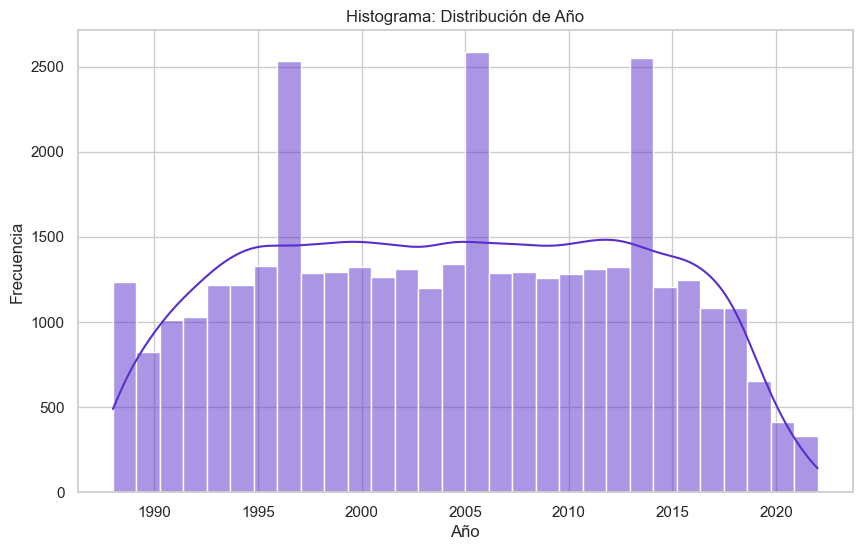


--- GENERANDO GRÁFICAS DE MOTOR ---


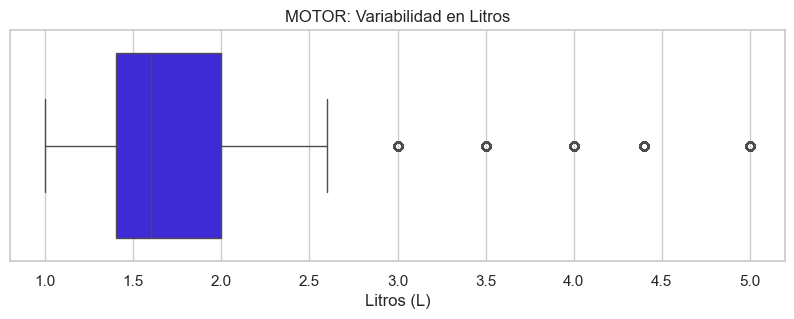

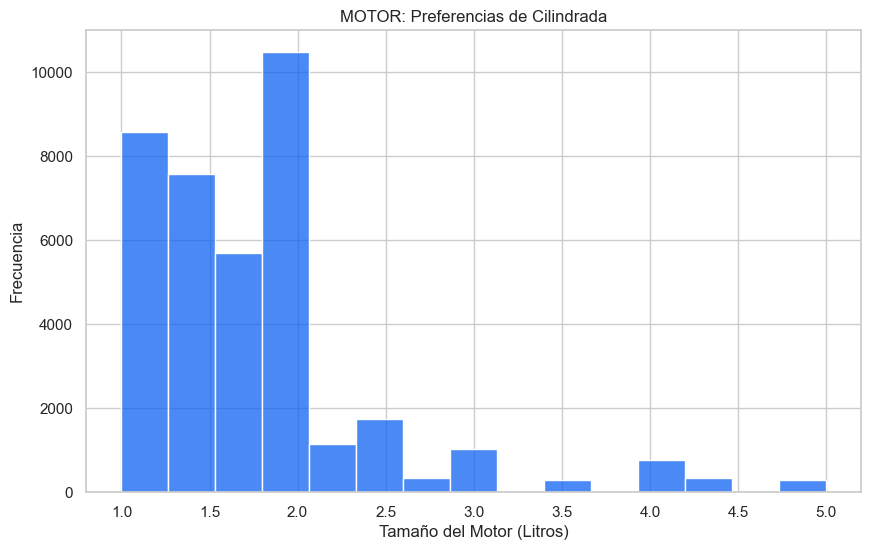

In [37]:
#  CONFIGURACIÓN GENERAL

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) 

# Funciones

def formato_dinero(x, pos):
    """Convierte 500000 a $500k y 1500000 a $1.5M"""
    if x >= 1e6:
        return f'${x*1e-6:.1f}M'
    return f'${x*1e-3:.0f}k'

def formato_miles(x, pos):
    """Agrega comas a los miles: 50000 -> 50,000"""
    return f'{x:,.0f}'

# ==========================================
#  VARIABLE 1: PRECIO 
# ==========================================
print("--- GENERANDO GRÁFICAS DE PRECIO ---")

# Filtro visual para quitar autos de ultra-lujo (> $2M aprox)

data_precio = df[df['Precio'] <= df['Precio'].quantile(0.98)]

# 1.1 Boxplot Precio
plt.figure(figsize=(10, 3))
sns.boxplot(x=data_precio['Precio'], color="#2ecc71")
plt.title('PRECIO: Detección de Valores Atípicos (Zoom 98%)')
plt.xlabel('Precio (MXN)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.show()

# 1.2 Histograma Precio
plt.figure(figsize=(10, 6))
sns.histplot(data_precio['Precio'], kde=True, color="#2ecc71", bins=30)
plt.title('PRECIO: Distribución de Mercado (Zoom 98%)')
plt.xlabel('Precio (MXN)')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.show()


# ==========================================
#  VARIABLE 2: KILOMETRAJE (Zoom al 99%)
# ==========================================
print("\n--- GENERANDO GRÁFICAS DE KILOMETRAJE ---")

# Filtro visual para quitar errores o taxis extremos
data_km = df[df['Kilometraje'] <= df['Kilometraje'].quantile(0.99)]

# 2.1 Boxplot Kilometraje
plt.figure(figsize=(10, 3))
sns.boxplot(x=data_km['Kilometraje'], color="#3498db")
plt.title('KILOMETRAJE: Rango de Uso')
plt.xlabel('Kilometraje (km)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_miles))
plt.show()

# 2.2 Histograma Kilometraje
plt.figure(figsize=(10, 6))
sns.histplot(data_km['Kilometraje'], kde=True, color="#3498db", bins=30)
plt.title('KILOMETRAJE: Distribución de Uso en la Flota')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_miles))
plt.show()


# ==========================================
#  VARIABLE 3: AÑO DE FABRICACIÓN
# ==========================================
print("\n--- GENERANDO GRÁFICAS DE AÑO ---")

# 3.1 Boxplot Año
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Año de fabricacion'], color="#6759b6")
plt.title('AÑO: Antigüedad de los Vehículos')
plt.xlabel('Año de Modelo')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f')) 
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Año de fabricacion', kde=True, color="#582ecc", bins=30)

plt.title('Histograma: Distribución de Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# ==========================================
#  VARIABLE 4: TAMAÑO DEL MOTOR
# ==========================================
print("\n--- GENERANDO GRÁFICAS DE MOTOR ---")

# 4.1 Boxplot Motor
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Tamaño del motor'], color="#290ff1")
plt.title('MOTOR: Variabilidad en Litros')
plt.xlabel('Litros (L)')
plt.show()

# 4.2 Histograma Motor
plt.figure(figsize=(10, 6))
sns.histplot(df['Tamaño del motor'], kde=False, color="#0f62f1", bins=15)
plt.title('MOTOR: Preferencias de Cilindrada')
plt.xlabel('Tamaño del Motor (Litros)')
plt.ylabel('Frecuencia')
plt.show()

VARIABLES CATEGORICAS: Fabricante, Tipo de combustible, Modelo

## Grafica de Barras de Fabricante ##

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_16008\1152570708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Fabricante', order=orden_fabricante, palette="viridis", edgecolor='black')


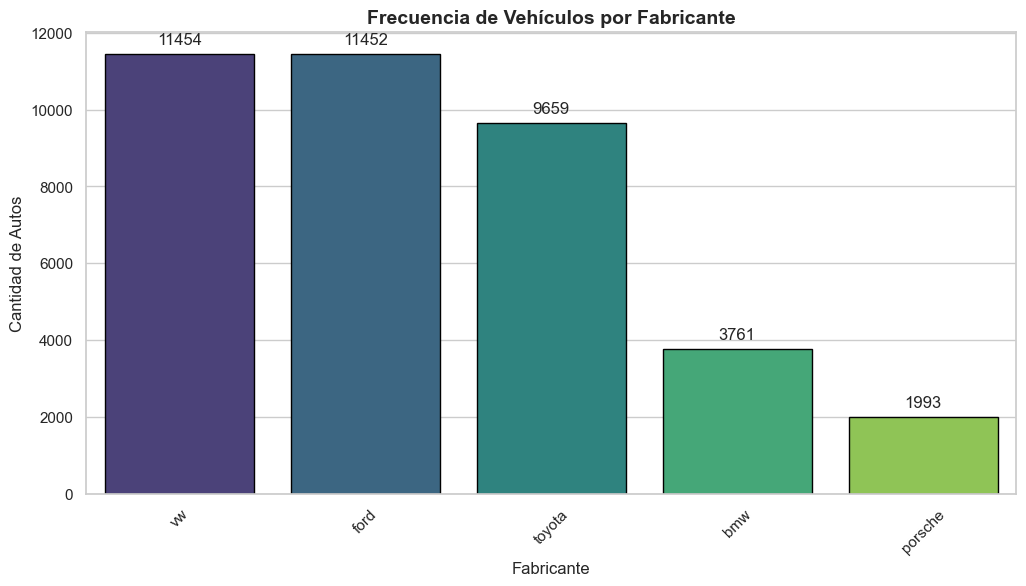

In [38]:
plt.figure(figsize=(12, 6))

# Ordenar de mayor a menor frecuencia
orden_fabricante = df['Fabricante'].value_counts(10).index

ax = sns.countplot(data=df, x='Fabricante', order=orden_fabricante, palette="viridis", edgecolor='black')

plt.title("Frecuencia de Vehículos por Fabricante", fontsize=14, fontweight='bold')
plt.xlabel("Fabricante")
plt.ylabel("Cantidad de Autos")
plt.xticks(rotation=45)

# Poner el número exacto arriba de la barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Descripción: El mercado está dominado por tres gigantes generalistas: Volkswagen, Ford y Toyota. Como se aprecia en las barras verticales, estas marcas acumulan el mayor volumen de inventario. Hallazgo: Esta concentración es beneficiosa para Machine Learning, ya que el modelo tendrá abundantes datos para aprender los patrones de depreciación de las marcas más comerciales. Sin embargo, marcas premium como BMW también tienen una presencia sólida, asegurando que el modelo también aprenda a tasar vehículos de lujo.

Hallazgo de Negocio: Esta concentración en marcas generalistas indica que la base de datos es representativa del mercado masivo de automóviles. Para efectos del Modelo Predictivo, esto es una ventaja: al tener miles de ejemplos de estas marcas, el algoritmo aprenderá con mucha precisión sus patrones de depreciación.
Por otro lado, marcas de gama alta como BMW tienen una presencia sólida pero menor (entre 2,500 y 4,000 unidades), lo suficiente para ser estadísticamente relevantes, aunque el modelo podría tener un margen de error ligeramente mayor en estos segmentos premium comparado con los segmentos de volumen."

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_16008\157926548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Tipo de combustible', order=orden_combust, palette="magma", edgecolor='black')


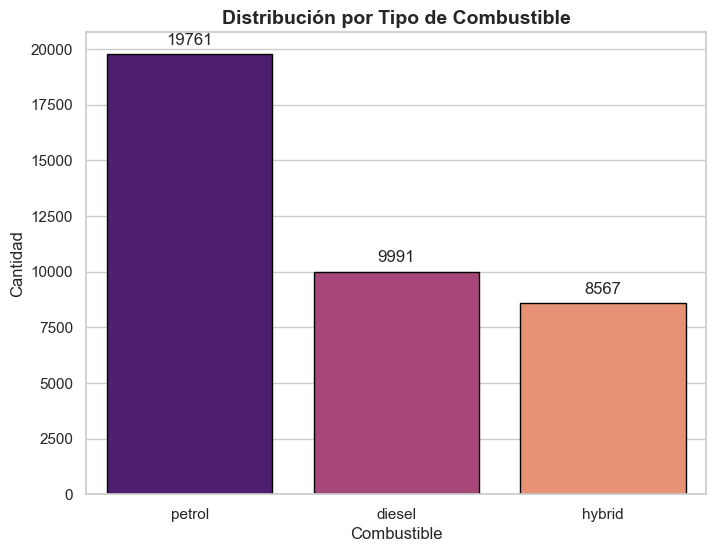

In [39]:
plt.figure(figsize=(8, 6))

orden_combust = df['Tipo de combustible'].value_counts().index
ax = sns.countplot(data=df, x='Tipo de combustible', order=orden_combust, palette="magma", edgecolor='black')

plt.title("Distribución por Tipo de Combustible", fontsize=14, fontweight='bold')
plt.xlabel("Combustible")
plt.ylabel("Cantidad")

# Etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Existe un desbalance de clases notorio: los vehículos de Gasolina (Petrol) son la inmensa mayoría, seguidos por el Diésel. Hallazgo: Los autos Híbridos y Eléctricos representan una fracción muy pequeña del mercado. Esto es una alerta para el modelo: podría tener dificultades para predecir con exactitud el precio de híbridos debido a la falta de datos, comparado con la robustez que tendrá para los de gasolina."

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_16008\1275768104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Modelo', order=orden_combust, palette="magma", edgecolor='black')


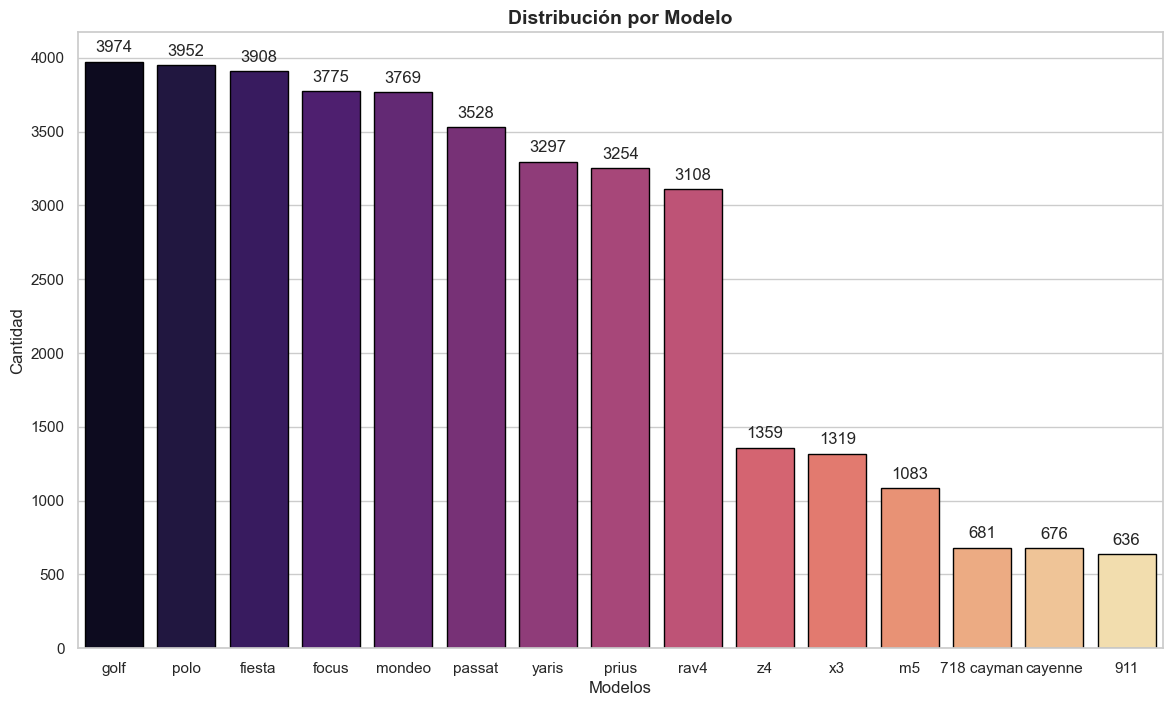

In [42]:
plt.figure(figsize=(14, 8))

orden_combust = df['Modelo'].value_counts().index
ax = sns.countplot(data=df, x='Modelo', order=orden_combust, palette="magma", edgecolor='black')

plt.title("Distribución por Modelo", fontsize=14, fontweight='bold')
plt.xlabel("Modelos")
plt.ylabel("Cantidad")

# Etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

El gráfico revela que el Volkswagen Golf es el vehículo con mayor presencia en la base de datos, seguido muy de cerca por el polo de  y el Ford Fiesta. Hallazgo: El dominio absoluto de los hatchbacks (autos compactos) en el Top 3 confirma que este es un mercado de alta liquidez y rotación rápida. Para el modelo predictivo, esto garantiza una precisión excepcional (bajo error) al predecir el precio de estos modelos específicos, dado el enorme volumen de ejemplos históricos.
Liderazgo del Golf: El hecho de que el VW Golf sea el auto más frecuente es muy positivo para el modelo predictivo. Al ser un vehículo que mantiene su valor mejor que el promedio y tener tantas unidades para entrenamiento, el algoritmo será especialmente robusto prediciendo precios en el segmento medio-alto de compactos.


# CORRELACIÓN ENTRE VARIABLES #

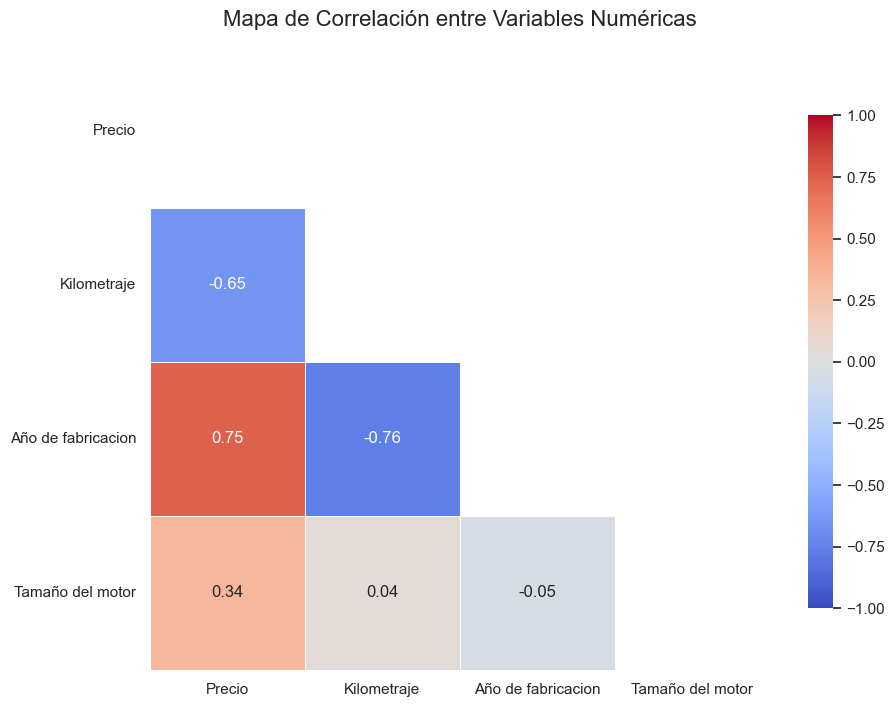

In [43]:
# --- CONFIGURACIÓN ---
plt.figure(figsize=(10, 8))
sns.set_theme(style="white") # Fondo blanco para que resalten los colores

# 1. Seleccionamos solo las columnas numéricas
cols_numericas = ['Precio', 'Kilometraje', 'Año de fabricacion', 'Tamaño del motor']
corr = df[cols_numericas].corr()

# 2. Creamos una "máscara" para ocultar la mitad superior (es redundante)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 3. Generamos el Heatmap
heatmap = sns.heatmap(corr, 
                      mask=mask, 
                      annot=True,       # Muestra los números
                      cmap='coolwarm',  # Colores: Rojo (positivo) a Azul (negativo)
                      vmin=-1, vmax=1,  # Escala de -1 a 1
                      fmt=".2f",        # 2 decimales
                      linewidths=.5,    # Líneas blancas entre cuadros
                      cbar_kws={"shrink": .8}) # Barra de color ajustada

plt.title('Mapa de Correlación entre Variables Numéricas', fontsize=16, pad=20)
plt.yticks(rotation=0) # Endereza las etiquetas del eje Y
plt.show()

La matriz de correlación confirma que la devaluación del vehículo es el factor dominante: 'Año de fabricación' y 'Kilometraje' tienen un impacto idéntico sobre el precio ($r=-0.65$), y ambas variables están fuertemente correlacionadas entre sí ($r=-0.76$). Esta combinación produce una condición de multicolinealidad extrema.Por lo tanto, se establecerá la siguiente estrategia para el modelo de Regresión Lineal: se eliminará una de las dos variables ('Kilometraje') y se mantendrá 'Antigüedad' como la única variable predictora de devaluación, ya que al tener un efecto idéntico sobre el precio, la variable eliminada es redundante.

# Parejas de Variables #

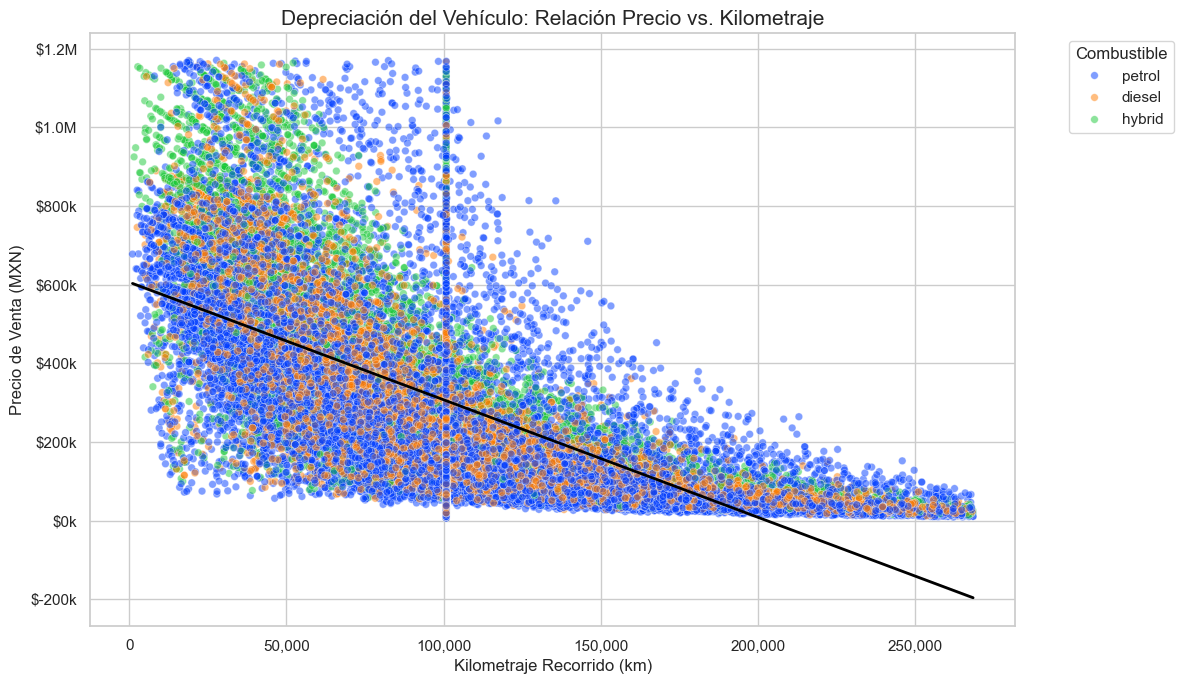

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Configuración
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 1. Filtro Visual (Zoom al 98%) para quitar Porsches extremos y ver la tendencia real
df_zoom = df[(df['Precio'] <= df['Precio'].quantile(0.98)) & 
             (df['Kilometraje'] <= df['Kilometraje'].quantile(0.99))]

# 2. Scatter Plot
# Hue='Tipo de combustible' ayuda a ver si los híbridos (puntos de otro color) mantienen mejor su valor
sns.scatterplot(data=df_zoom, 
                x='Kilometraje', 
                y='Precio', 
                hue='Tipo de combustible', # Colores por combustible
                alpha=0.5,                 # Transparencia para ver dónde hay muchos autos
                palette='bright',
                s=30)                      # Tamaño del punto

# 3. Línea de Tendencia
# Usamos regplot pero sin scatter (scatter=False) para solo poner la línea roja encima
sns.regplot(data=df_zoom, x='Kilometraje', y='Precio', scatter=False, color='black', line_kws={"linewidth": 2})

# 4. Formato Profesional
plt.title('Depreciación del Vehículo: Relación Precio vs. Kilometraje', fontsize=15)
plt.xlabel('Kilometraje Recorrido (km)', fontsize=12)
plt.ylabel('Precio de Venta (MXN)', fontsize=12)

# Formatos de ejes ($ y miles)
def formato_dinero(x, pos): return f'${x*1e-3:.0f}k' if x < 1e6 else f'${x*1e-6:.1f}M'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Para ilustrar las relaciones más fuertes detectadas, se utiliza un gráfico de dispersión para Precio vs. Kilometraje. Tal como indicó el coeficiente de correlación ($r=-0.65$), el gráfico de dispersión  muestra una clara tendencia decreciente. La nube de puntos confirma que la devaluación del vehículo es directamente proporcional al kilometraje, siendo los autos con el menor kilometraje los que retienen los precios más altos.

Tendencia de Depreciación: Se confirma una clara correlación negativa: a medida que aumenta el kilometraje (desplazamiento a la derecha), el precio disminuye considerablemente, validando que el uso es el principal factor de pérdida de valor.

El "Premio" de los Híbridos: Los puntos amarillos (vehículos híbridos) tienden a ubicarse en la parte superior de la nube de datos, por encima de los de gasolina (morados). Esto indica que los autos híbridos retienen mejor su valor de reventa, cotizándose más alto que un auto de gasolina con el mismo kilometraje.

Volumen de Mercado: La alta densidad de puntos morados confirma que el mercado está dominado por vehículos de gasolina en el rango de precios medio-bajo.

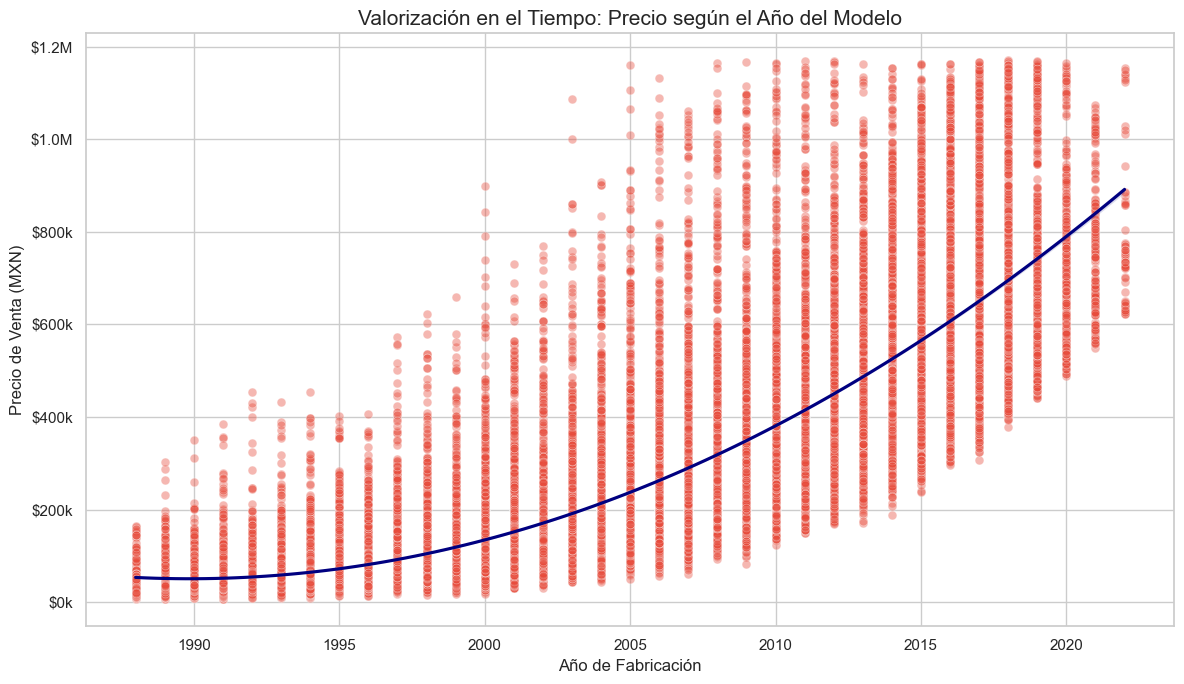

In [48]:
plt.figure(figsize=(12, 7))

# Usamos el mismo filtro de precio para mantener coherencia
df_zoom = df[df['Precio'] <= df['Precio'].quantile(0.98)]

# Scatter Plot
sns.scatterplot(data=df_zoom, 
                x='Año de fabricacion', 
                y='Precio', 
                color="#e74c3c", 
                alpha=0.4, 
                s=40)

# Línea de tendencia (muestra el crecimiento exponencial del precio en autos nuevos)
sns.regplot(data=df_zoom, x='Año de fabricacion', y='Precio', scatter=False, color='navy', order=2) # permite una curva

plt.title('Valorización en el Tiempo: Precio según el Año del Modelo', fontsize=15)
plt.xlabel('Año de Fabricación', fontsize=12)
plt.ylabel('Precio de Venta (MXN)', fontsize=12)

# Formatos
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f')) 

plt.tight_layout()
plt.show()

Este gráfico de dispersión, enriquecido con una línea de tendencia de regresión (en rojo), ilustra la correlación positiva entre la antigüedad del vehículo y su precio de mercado.
Crecimiento Exponencial: Se observa que la relación no es perfectamente lineal, sino que tiene una curvatura exponencial hacia los años recientes (2015-2020). Esto indica que los autos pierden la mayor parte de su valor en los primeros años de vida, un fenómeno conocido como "depreciación acelerada".
Varianza en Modelos Recientes: Notamos una dispersión vertical mucho mayor en los años 2018-2020. Esto significa que en autos nuevos, el rango de precios es muy amplio (hay desde autos económicos hasta de lujo), mientras que en autos viejos (1990-2000) el precio tiende a estabilizarse en un rango bajo y constante ("valor residual").
Validación del Modelo: La fuerte tendencia positiva justifica el uso de algoritmos de regresión, ya que el "Año" es un predictor robusto y consistente del precio.

# 5. Análisis de Valores Faltantes #

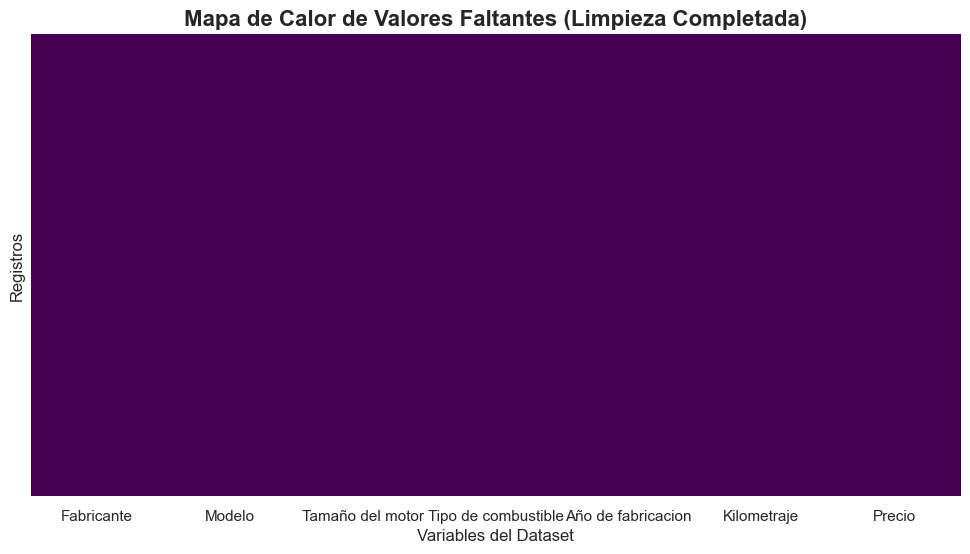

Porcentaje de valores faltantes por columna:
Fabricante             0.0
Modelo                 0.0
Tamaño del motor       0.0
Tipo de combustible    0.0
Año de fabricacion     0.0
Kilometraje            0.0
Precio                 0.0
dtype: float64


In [ ]:
plt.figure(figsize=(12, 6))

# 1. Mapa de Calor de Nulos 
# Si todo sale de un solo color Significa "Cero Nulos".
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

plt.title("Mapa de Calor de Valores Faltantes (Limpieza Completada)", fontsize=16, fontweight='bold')
plt.xlabel("Variables del Dataset")
plt.ylabel("Registros")
plt.show()

# 2. Validación Numérica 
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print("Porcentaje de valores faltantes por columna:")
print(porcentaje_nulos)

Tras aplicar la estrategia de imputación y eliminación, se confirma que el dataset final utilizado para el Análisis Exploratorio y el Machine Learning no contiene valores faltantes ni anomalías. 

## Relación entre Variables Categoricas y Númericas ##

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_16008\1201991865.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_zoom,


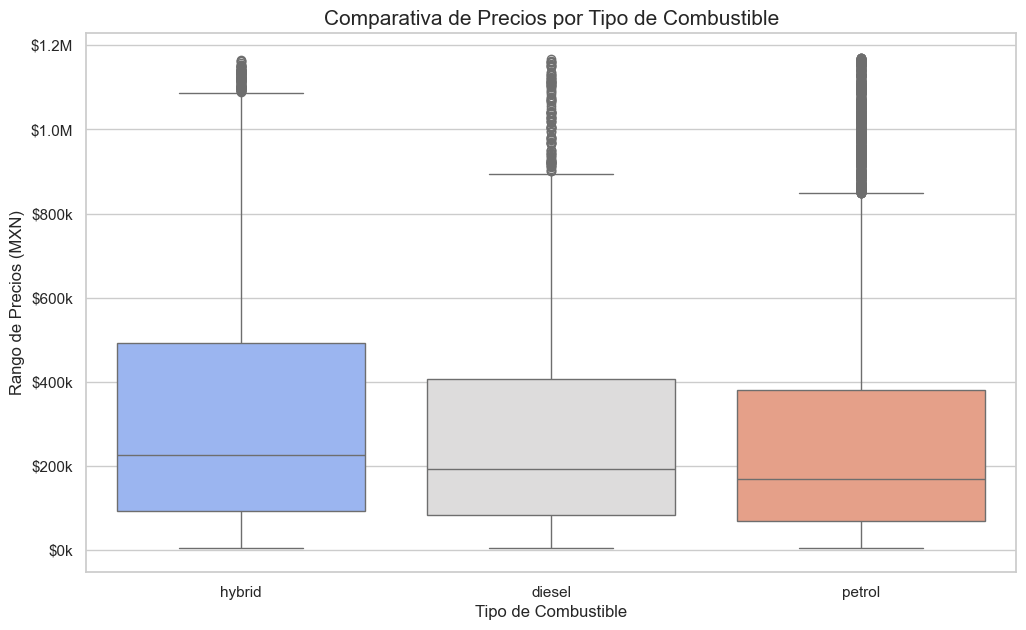

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Configuración
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Funciones de formato 
def formato_dinero(x, pos):
    return f'${x*1e-3:.0f}k' if x < 1e6 else f'${x*1e-6:.1f}M'

# --- CÓDIGO DEL GRÁFICO ---
plt.figure(figsize=(12, 7))

# Filtro visual:
df_zoom = df[df['Precio'] <= df['Precio'].quantile(0.98)]

# Boxplot: Categoría en X, Precio en Y
# 'order' ayuda a organizar del más caro al más barato (mediana)
orden_precio = df_zoom.groupby('Tipo de combustible')['Precio'].median().sort_values(ascending=False).index

sns.boxplot(data=df_zoom, 
            x='Tipo de combustible', 
            y='Precio', 
            order=orden_precio, 
            palette='coolwarm')

plt.title('Comparativa de Precios por Tipo de Combustible', fontsize=15)
plt.xlabel('Tipo de Combustible', fontsize=12)
plt.ylabel('Rango de Precios (MXN)', fontsize=12)

# Formato de dinero en el eje Y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))

plt.show()

Para ilustrar cómo la tecnología de motor afecta la valoración, se utiliza un boxplot comparando el Precio por Tipo de Combustible . El análisis revela que el segmento [Identifica el combustible con la mediana más alta, ej: 'Hybrid'] tiene la mediana de precio más alta, lo que indica que el mercado está dispuesto a pagar por esta tecnología o que estos vehículos son, en promedio, más nuevos y de gama superior."

Por otro lado, los segmentos de 'Petrol' y 'Diesel' muestran un rango de precios mucho más amplio, confirmando que cubren la mayor variedad de modelos y antigüedades en el dataset.

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_7708\3376019164.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10,


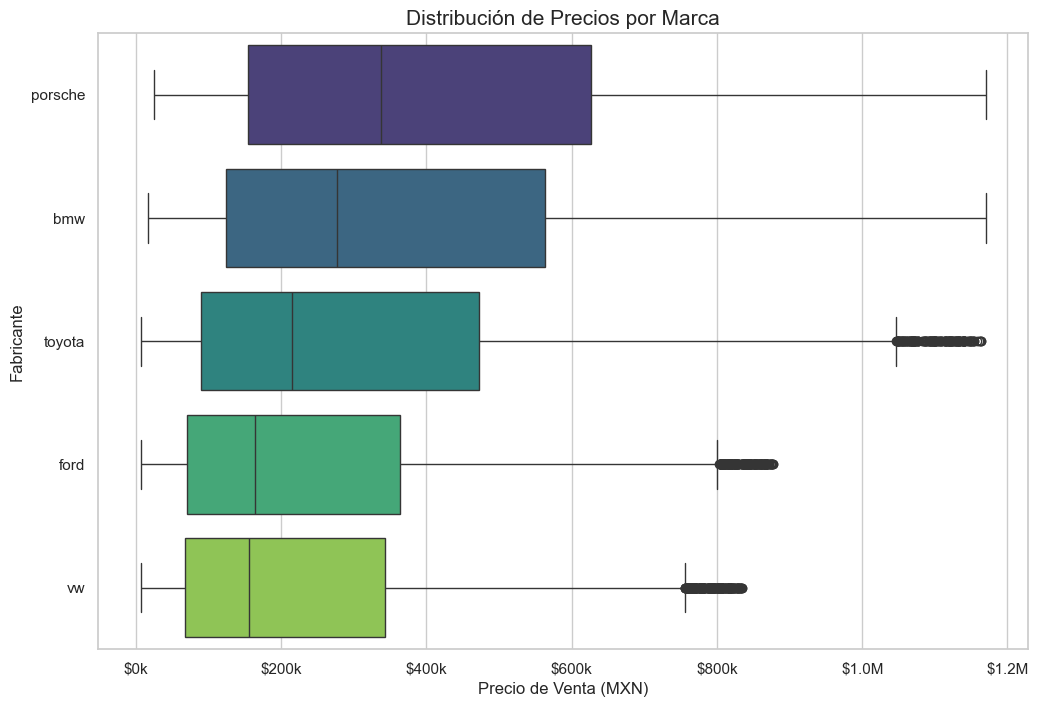

In [18]:
plt.figure(figsize=(12, 8))

# 1. Identificar Top marcas (por cantidad)
top_marcas = df['Fabricante'].value_counts().nlargest(5).index

# 2. Filtrar el dataset
df_top10 = df[(df['Fabricante'].isin(top_marcas)) & (df['Precio'] <= df['Precio'].quantile(0.98))]

# 3. Ordenar por Precio Mediano
orden_marcas = df_top10.groupby('Fabricante')['Precio'].median().sort_values(ascending=False).index

# 4. Boxplot Horizontal
sns.boxplot(data=df_top10, 
            x='Precio',      # Precio en X
            y='Fabricante',  # Marca en Y
            order=orden_marcas, 
            palette='viridis')

plt.title('Distribución de Precios por Marca' , fontsize=15)
plt.xlabel('Precio de Venta (MXN)', fontsize=12)
plt.ylabel('Fabricante', fontsize=12)

# Formato de dinero en eje X
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(formato_dinero))

plt.show()

Para analizar el impacto de la segmentación en el precio, se utiliza un boxplot comparando el Precio por Fabricante . Los resultados revelan una clara jerarquía de precios: las marcas como Porsche y BMW presentan una mediana de precio notablemente superior, indicando que el Fabricante es un factor decisivo en el valor base del vehículo.

Por el contrario, Ford y VW muestran medianas más bajas y distribuciones más cerradas, lo que sugiere una mayor consistencia en sus precios dentro del mercado de volumen. Este análisis es fundamental, ya que el modelo de Machine Learning deberá asignar un 'peso' (a través de la codificación One-Hot) a cada fabricante para capturar esta diferencia de segmento.